<a href="https://colab.research.google.com/github/buzzbing/transformer_based_problem_to_solution/blob/main/TokenizerDescriptionCpp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_datasets
!pip install -U 'tensorflow-text==2.8.*'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.2 MB/s 
     |████████████████████████████████| 498.0 MB 11 kB/s 
     |████████████████████████████████| 1.4 MB 48.0 MB/s 
     |████████████████████████████████| 462 kB 77.2 MB/s 
     |████████████████████████████████| 5.8 MB 49.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstall

In [ ]:
import collections
import os
import pathlib
import re
import string
import sys
import tempfile
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_text as text
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
import keras
import logging


In [ ]:
logging.getLogger('tensorflow').setLevel(logging.ERROR)  

In [ ]:
dataset = pd.read_csv("drive/MyDrive/MajorProjectDesc2Cpp/CPPdatasetPartB.csv")

In [ ]:
# for each in range(0,len(dataset)):
#     each = str(each)
dataset.head()

,Id,Problem,Solution
0,1,Write a C++ Program to C++ Program to Add Two ...,#include <iostream>\nusing namespace std;\n\ni...
1,2,Write a C++ Program to Display Number (Entered...,#include <iostream>\nusing namespace std;\n\ni...
2,3,Write a C++ Program to Find Quotient and Remai...,#include <iostream>\nusing namespace std;\n\ni...
3,4,Write a C++ Program to Swap Two Numbers withou...,#include <iostream>\nusing namespace std;\n\ni...
4,5,Write a program to find size of int_._ float_....,#include <iostream>\nusing namespace std;\n\ni...


In [ ]:
from collections import Counter

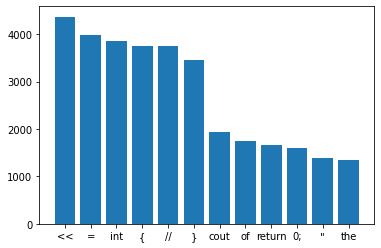

In [ ]:
a= Counter(" ".join(dataset["Solution"]).split()).most_common(12)
plt.bar(*zip(*a))
plt.show()

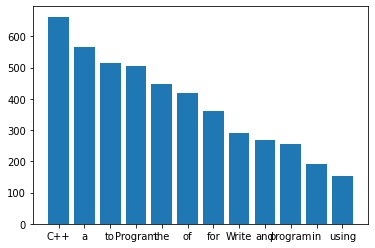

In [ ]:

a = Counter(" ".join(dataset["Problem"]).split()).most_common(12)
plt.bar(*zip(*a))
plt.show()

In [ ]:
# train_examples = dataset[500:]
# val_examples = dataset[:500]
# # test_examples = dataset[12000:]

In [ ]:
len(dataset)

939

In [ ]:
print(dataset.iloc[0,0])

print(dataset.iloc[0,1])
print(dataset.iloc[0,2])

1
Write a C++ Program to C++ Program to Add Two Numbers
#include <iostream>
using namespace std;

int main()
{
    int first_._ second_._ sum;

    cout << "Enter 1st integer :: ";
    cin >> first;
    cout << "\nEnter 2nd integer :: ";
    cin >> second;

    sum = first + second;

    cout<<"\nSum of Two Numbers [ "<<first<<" + "<<second<<" ] = "<<sum<<"\n";

    return 0;
}


In [ ]:
def dataset_to_tensor(data_examples):
  data_prob = []
  for i in range(0,len(data_examples)):
    temp = str(data_examples.iloc[i,1])
    tempval = temp.replace('_._',',')
    data_prob.append(tempval)

  # inputs = data_examples['problem']
  print(data_prob[0])
  print(type(data_prob))

  data_sol = []
  for i in range(0,len(data_examples)):
    temp = str(data_examples.iloc[i,2])
    tempval = temp.replace('_._',',')
    data_sol.append(tempval)

  # inputs = data_examples['solution']
  print(data_sol[0])
  print(type(data_sol))

  tensor_prob = tf.convert_to_tensor(data_prob)
  tensor_sol = tf.convert_to_tensor(data_sol)

  tensor_data = tf.data.Dataset.from_tensor_slices((tensor_prob,tensor_sol))

  # tf.data.experimental.cardinality(tensor_data)
  return tensor_data, tensor_prob, tensor_sol;

In [ ]:
# val_data , prob_tensr, sol_tensr = dataset_to_tensor(val_examples)
train_data, train_p, train_s = dataset_to_tensor(dataset)

Write a C++ Program to C++ Program to Add Two Numbers
<class 'list'>
#include <iostream>
using namespace std;

int main()
{
    int first, second, sum;

    cout << "Enter 1st integer :: ";
    cin >> first;
    cout << "\nEnter 2nd integer :: ";
    cin >> second;

    sum = first + second;

    cout<<"\nSum of Two Numbers [ "<<first<<" + "<<second<<" ] = "<<sum<<"\n";

    return 0;
}
<class 'list'>


In [ ]:
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [ ]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = 10000,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [ ]:
train_pb = tf.data.Dataset.from_tensor_slices(train_p)
train_sl = tf.data.Dataset.from_tensor_slices(train_s)

In [ ]:
%%time
prob_vocab = bert_vocab.bert_vocab_from_dataset(
    train_pb.batch(2000).prefetch(20),
    **bert_vocab_args
)
sol_vocab = bert_vocab.bert_vocab_from_dataset(
    train_sl.batch(2000).prefetch(20),
    **bert_vocab_args
)

CPU times: user 16.5 s, sys: 77.8 ms, total: 16.5 s
Wall time: 16.7 s


In [ ]:
print(prob_vocab[:10])
print(prob_vocab[100:110])
# print(prob_vocab[1000:1010])
print(prob_vocab[-10:])
print()
print(sol_vocab[:10])
print(sol_vocab[100:110])
# print(sol_vocab[1000:1010])
print(sol_vocab[-10:])

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '$', '%', '&']
['##es', '##ate', 'or', 'integer', 'should', 'check', 'with', '##y', 'sum', '##er']
['##u', '##v', '##w', '##z', '##|', '##–', '##—', '##’', '##“', '##”']

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '$', '%', '&']
['in', 'and', 'function', 'sum', 'num', 'str', 'enter', 'char', '10', 'else']
['##z', '##{', '##|', '##}', '##~', '##–', '##‘', '##’', '##“', '##”']


In [ ]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
write_vocab_file('prob_vocab.txt', prob_vocab)
write_vocab_file('sol_vocab.txt', sol_vocab)

In [ ]:
write_vocab_file('drive/MyDrive/MajorProjectDesc2Cpp/prob_vocab.txt', prob_vocab)
write_vocab_file('drive/MyDrive/MajorProjectDesc2Cpp/sol_vocab.txt', sol_vocab)

In [ ]:
!ls *.txt

prob_vocab.txt	sol_vocab.txt


In [ ]:
prob_tokenizer = text.BertTokenizer('/content/prob_vocab.txt', **bert_tokenizer_params)
sol_tokenizer = text.BertTokenizer('/content/sol_vocab.txt', **bert_tokenizer_params)


In [ ]:
for pb_examples in train_pb.batch(2).take(1):
  for ex in pb_examples:
    print(ex.numpy())
print()
for sol_examples in train_sl.batch(2).take(1):
  for ex in sol_examples:
    print(ex.numpy())

b'Write a C++ Program to C++ Program to Add Two Numbers'
b'Write a C++ Program to Display Number (Entered by the User)'

b'#include <iostream>\nusing namespace std;\n\nint main()\n{\n    int first, second, sum;\n\n    cout << "Enter 1st integer :: ";\n    cin >> first;\n    cout << "\\nEnter 2nd integer :: ";\n    cin >> second;\n\n    sum = first + second;\n\n    cout<<"\\nSum of Two Numbers [ "<<first<<" + "<<second<<" ] = "<<sum<<"\\n";\n\n    return 0;\n}'
b'#include <iostream>\nusing namespace std;\n\nint main()\n{\n    int number;\n\n    cout << "Enter an integer :: ";\n    cin >> number;\n\n    cout << "\\nThe Number entered is :: " << number<<"\\n";\n    return 0;\n}'


In [ ]:
# Tokenize the examples -> (batch, word, word-piece)
token_batch_prob = prob_tokenizer.tokenize(pb_examples)
# Merge the word and word-piece axes -> (batch, tokens)
token_batch_prob = token_batch_prob.merge_dims(-2,-1)

for ex in token_batch_prob.to_list():
  print(ex)

[76, 39, 41, 14, 14, 71, 72, 41, 14, 14, 71, 72, 175, 86, 85]
[76, 39, 41, 14, 14, 71, 72, 146, 80, 11, 299, 98, 110, 73, 194, 12]


In [ ]:


# Tokenize the examples -> (batch, word, word-piece)
token_batch_sol = sol_tokenizer.tokenize(sol_examples)
# Merge the word and word-piece axes -> (batch, tokens)
token_batch_sol = token_batch_sol.merge_dims(-2,-1)

for ex in token_batch_sol.to_list():
  print(ex)

[6, 83, 31, 95, 33, 84, 92, 85, 30, 75, 89, 11, 12, 66, 75, 112, 15, 159, 15, 102, 30, 76, 31, 31, 5, 105, 341, 279, 29, 29, 5, 30, 90, 33, 33, 112, 30, 76, 31, 31, 5, 36, 118, 361, 279, 29, 29, 5, 30, 90, 33, 33, 159, 30, 102, 32, 112, 14, 159, 30, 76, 31, 31, 5, 36, 810, 77, 141, 148, 35, 5, 31, 31, 112, 31, 31, 5, 14, 5, 31, 31, 159, 31, 31, 5, 37, 32, 5, 31, 31, 102, 31, 31, 5, 36, 53, 5, 30, 78, 19, 30, 68]
[6, 83, 31, 95, 33, 84, 92, 85, 30, 75, 89, 11, 12, 66, 75, 96, 30, 76, 31, 31, 5, 105, 155, 279, 29, 29, 5, 30, 90, 33, 33, 96, 30, 76, 31, 31, 5, 36, 227, 96, 357, 86, 29, 29, 5, 31, 31, 96, 31, 31, 5, 36, 53, 5, 30, 78, 19, 30, 68]


In [ ]:
# Lookup each token id in the vocabulary.
txt_tokens_prob = tf.gather(prob_vocab, token_batch_prob)
# Join with spaces.
tf.strings.reduce_join(txt_tokens_prob, separator=' ', axis=-1)



<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'write a c + + program to c + + program to add two numbers',
       b'write a c + + program to display number ( enter ##ed by the user )'],
      dtype=object)>

In [ ]:
prob_words = prob_tokenizer.detokenize(token_batch_prob)
tf.strings.reduce_join(prob_words, separator=' ', axis=-1)

sol_words = sol_tokenizer.detokenize(token_batch_sol)
tf.strings.reduce_join(sol_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'# include < iostream > using namespace std ; int main ( ) { int first , second , sum ; cout < < " enter 1st integer : : " ; cin > > first ; cout < < " \\ nenter 2nd integer : : " ; cin > > second ; sum = first + second ; cout < < " \\ nsum of two numbers [ " < < first < < " + " < < second < < " ] = " < < sum < < " \\ n " ; return 0 ; }',
       b'# include < iostream > using namespace std ; int main ( ) { int number ; cout < < " enter an integer : : " ; cin > > number ; cout < < " \\ nthe number entered is : : " < < number < < " \\ n " ; return 0 ; }'],
      dtype=object)>

In [ ]:
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  return tf.concat([starts, ragged, ends], axis=1)

In [ ]:
prob_words = prob_tokenizer.detokenize(add_start_end(token_batch_prob))
tf.strings.reduce_join(prob_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'[START] write a c + + program to c + + program to add two numbers [END]',
       b'[START] write a c + + program to display number ( entered by the user ) [END]'],
      dtype=object)>

In [ ]:
sol_words = sol_tokenizer.detokenize(add_start_end(token_batch_sol))
tf.strings.reduce_join(sol_words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'[START] # include < iostream > using namespace std ; int main ( ) { int first , second , sum ; cout < < " enter 1st integer : : " ; cin > > first ; cout < < " \\ nenter 2nd integer : : " ; cin > > second ; sum = first + second ; cout < < " \\ nsum of two numbers [ " < < first < < " + " < < second < < " ] = " < < sum < < " \\ n " ; return 0 ; } [END]',
       b'[START] # include < iostream > using namespace std ; int main ( ) { int number ; cout < < " enter an integer : : " ; cin > > number ; cout < < " \\ nthe number entered is : : " < < number < < " \\ n " ; return 0 ; } [END]'],
      dtype=object)>

In [ ]:
def cleanup_text(reserved_tokens, token_txt):
  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)
    
  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [ ]:
token_batch = sol_tokenizer.tokenize(sol_examples).merge_dims(-2,-1)
words =sol_tokenizer.detokenize(token_batch)
words

<tf.RaggedTensor [[b'#', b'include', b'<', b'iostream', b'>', b'using', b'namespace', b'std',
  b';', b'int', b'main', b'(', b')', b'{', b'int', b'first', b',',
  b'second', b',', b'sum', b';', b'cout', b'<', b'<', b'"', b'enter',
  b'1st', b'integer', b':', b':', b'"', b';', b'cin', b'>', b'>', b'first',
  b';', b'cout', b'<', b'<', b'"', b'\\', b'nenter', b'2nd', b'integer',
  b':', b':', b'"', b';', b'cin', b'>', b'>', b'second', b';', b'sum', b'=',
  b'first', b'+', b'second', b';', b'cout', b'<', b'<', b'"', b'\\',
  b'nsum', b'of', b'two', b'numbers', b'[', b'"', b'<', b'<', b'first',
  b'<', b'<', b'"', b'+', b'"', b'<', b'<', b'second', b'<', b'<', b'"',
  b']', b'=', b'"', b'<', b'<', b'sum', b'<', b'<', b'"', b'\\', b'n', b'"',
  b';', b'return', b'0', b';', b'}']                                        ,
 [b'#', b'include', b'<', b'iostream', b'>', b'using', b'namespace', b'std',
  b';', b'int', b'main', b'(', b')', b'{', b'int', b'number', b';', b'cout',
  b'<', b'<', b'"', 

In [ ]:
cleanup_text(reserved_tokens, words).numpy()

array([b'# include < iostream > using namespace std ; int main ( ) { int first , second , sum ; cout < < " enter 1st integer : : " ; cin > > first ; cout < < " \\ nenter 2nd integer : : " ; cin > > second ; sum = first + second ; cout < < " \\ nsum of two numbers [ " < < first < < " + " < < second < < " ] = " < < sum < < " \\ n " ; return 0 ; }',
       b'# include < iostream > using namespace std ; int main ( ) { int number ; cout < < " enter an integer : : " ; cin > > number ; cout < < " \\ nthe number entered is : : " < < number < < " \\ n " ; return 0 ; }'],
      dtype=object)

In [ ]:
class CustomTokenizer(tf.Module):
  def __init__(self, reserved_tokens, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
    self._reserved_tokens = reserved_tokens
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)

    ## Create the signatures for export:   

    # Include a tokenize signature for a batch of strings. 
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))

    # Include `detokenize` and `lookup` signatures for:
    #   * `Tensors` with shapes [tokens] and [batch, tokens]
    #   * `RaggedTensors` with shape [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    # These `get_*` methods take no arguments
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()

  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Merge the `word` and `word-piece` axes.
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens)

In [ ]:
tokenizers = tf.Module()
tokenizers.prob = CustomTokenizer(reserved_tokens, '/content/prob_vocab.txt')
tokenizers.sol = CustomTokenizer(reserved_tokens, '/content/sol_vocab.txt')

In [ ]:
model_name = 'desc_to_code_converter'
tf.saved_model.save(tokenizers, model_name)
tf.saved_model.save(tokenizers,export_dir="drive/MyDrive/MajorProjectDesc2Cpp/Tokenizer/")


In [ ]:
!zip -r {model_name}.zip {model_name}

  adding: desc_to_code_converter/ (stored 0%)
  adding: desc_to_code_converter/variables/ (stored 0%)
  adding: desc_to_code_converter/variables/variables.index (deflated 33%)
  adding: desc_to_code_converter/variables/variables.data-00000-of-00001 (deflated 47%)
  adding: desc_to_code_converter/saved_model.pb (deflated 91%)
  adding: desc_to_code_converter/assets/ (stored 0%)
  adding: desc_to_code_converter/assets/sol_vocab.txt (deflated 48%)
  adding: desc_to_code_converter/assets/prob_vocab.txt (deflated 46%)


In [ ]:
# investigate the distribution of tokens per example in the dataset:

lengths = []

for p, s in train_data.batch(1024):
  
  prob_tokens = tokenizers.sol.tokenize(p)
  lengths.append(prob_tokens.row_lengths())

  sol_tokens = tokenizers.sol.tokenize(s)
  lengths.append(sol_tokens.row_lengths())
  # print('.', end='', flush=True)



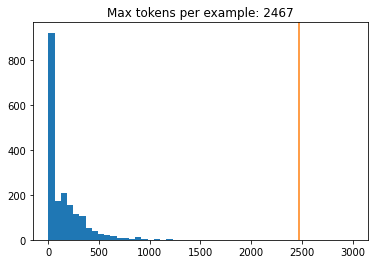

In [ ]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 3000))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Max tokens per example: {max_length}');

